### In this notebook we explore how to use PyBATS to perform Bayesian time series forecasting

In [1]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar

In [2]:
df_transaction=pd.read_csv('train.csv')
df_transaction.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


### Subsetting the data for Wine, Liquor Beer and store 44

In [4]:
df_transaction_subset=df_transaction[(df_transaction['family']=='LIQUOR,WINE,BEER') & (df_transaction['store_nbr']==44)]
df_transaction_subset

,id,date,store_nbr,family,sales,onpromotion
1276,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0
3058,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0
4840,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0
6622,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0
8404,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0
...,...,...,...,...,...,...
2993254,2993254,2017-08-11,44,"LIQUOR,WINE,BEER",560.0,10
2995036,2995036,2017-08-12,44,"LIQUOR,WINE,BEER",454.0,8
2996818,2996818,2017-08-13,44,"LIQUOR,WINE,BEER",252.0,8
2998600,2998600,2017-08-14,44,"LIQUOR,WINE,BEER",186.0,6


#### Flagging High promotion and low promotion

In [5]:
def classify_distribution(df, column_name):
    # Get the unique elements in the column
    unique_values = df[column_name].unique()

    # Sort the unique values
    unique_values.sort()

    # Calculate quartiles
    num_unique_values = len(unique_values)
    q25_index = num_unique_values // 4
    q50_index = num_unique_values // 2
    q75_index = (3 * num_unique_values) // 4

    # Define classification thresholds
    zero_threshold = unique_values[0]
    low_threshold = unique_values[q25_index]
    medium_threshold = unique_values[q50_index]
    large_threshold = unique_values[q75_index]

    # Classify values based on the thresholds
    def classify(value):
        if value == zero_threshold:
            return '0'
        elif value>0 and value <= low_threshold:
            return 'low'
        elif value> low_threshold and value <= medium_threshold:
            return 'medium'
        else:
            return 'large'

    # Create a new column with the classifications
    df['Classified_promo_3'] = df[column_name].apply(classify)

    return df

df_transaction_subset_new=classify_distribution(df_transaction_subset, 'onpromotion')
df_transaction_subset_new.head(10)

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\3906242383.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classified_promo_3'] = df[column_name].apply(classify)


,id,date,store_nbr,family,sales,onpromotion,Classified_promo_3
1276,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0,0
3058,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0,0
4840,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0,0
6622,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0,0
8404,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0,0
10186,10186,2013-01-06,44,"LIQUOR,WINE,BEER",0.0,0,0
11968,11968,2013-01-07,44,"LIQUOR,WINE,BEER",157.0,0,0
13750,13750,2013-01-08,44,"LIQUOR,WINE,BEER",159.0,0,0
15532,15532,2013-01-09,44,"LIQUOR,WINE,BEER",199.0,0,0
17314,17314,2013-01-10,44,"LIQUOR,WINE,BEER",186.0,0,0


In [6]:
df_transaction_subset_new['promo_flag_new']=(df_transaction_subset_new['Classified_promo_3']=='medium') | (df_transaction_subset_new['Classified_promo_3']=='large')
df_transaction_subset_new['promo_flag_new']=df_transaction_subset_new['promo_flag_new'].astype(int)
df_transaction_subset_new

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\3305258619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction_subset_new['promo_flag_new']=(df_transaction_subset_new['Classified_promo_3']=='medium') | (df_transaction_subset_new['Classified_promo_3']=='large')
C:\Users\madha\AppData\Local\Temp\ipykernel_28752\3305258619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction_subset_new['promo_flag_new']=df_transaction_subset_new['promo_flag_new'].astype(int)


,id,date,store_nbr,family,sales,onpromotion,Classified_promo_3,promo_flag_new
1276,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0,0,0
3058,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0,0,0
4840,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0,0,0
6622,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0,0,0
8404,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0,0,0
...,...,...,...,...,...,...,...,...
2993254,2993254,2017-08-11,44,"LIQUOR,WINE,BEER",560.0,10,large,1
2995036,2995036,2017-08-12,44,"LIQUOR,WINE,BEER",454.0,8,large,1
2996818,2996818,2017-08-13,44,"LIQUOR,WINE,BEER",252.0,8,large,1
2998600,2998600,2017-08-14,44,"LIQUOR,WINE,BEER",186.0,6,medium,1


In [8]:
df_transaction_subset_new['date'] = pd.to_datetime(df_transaction_subset_new['date'], format='%Y-%m-%d')
df_transaction_subset_new.head()

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\2725010856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction_subset_new['date'] = pd.to_datetime(df_transaction_subset_new['date'], format='%Y-%m-%d')


,id,date,store_nbr,family,sales,onpromotion,Classified_promo_3,promo_flag_new
1276,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0,0,0
3058,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0,0,0
4840,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0,0,0
6622,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0,0,0
8404,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0,0,0


#### Merging Holidays

In [12]:
holiday_df=pd.read_csv('holidays_events.csv')
holiday_df['date'] = pd.to_datetime(holiday_df['date'], format='%Y-%m-%d')
holiday_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [13]:
df_holiday_join = pd.merge(df_transaction_subset_new, holiday_df[['date','type']], on='date', how='left')
df_holiday_join

,id,date,store_nbr,family,sales,onpromotion,Classified_promo_3,promo_flag_new,type
0,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0,0,0,Holiday
1,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0,0,0,NaN
2,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0,0,0,NaN
3,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0,0,0,NaN
4,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0,0,0,Work Day
...,...,...,...,...,...,...,...,...,...
1709,2993254,2017-08-11,44,"LIQUOR,WINE,BEER",560.0,10,large,1,Transfer
1710,2995036,2017-08-12,44,"LIQUOR,WINE,BEER",454.0,8,large,1,NaN
1711,2996818,2017-08-13,44,"LIQUOR,WINE,BEER",252.0,8,large,1,NaN
1712,2998600,2017-08-14,44,"LIQUOR,WINE,BEER",186.0,6,medium,1,NaN


In [14]:
df_no_duplicates = df_holiday_join.drop_duplicates(subset=['id'])
df_no_duplicates

,id,date,store_nbr,family,sales,onpromotion,Classified_promo_3,promo_flag_new,type
0,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0,0,0,Holiday
1,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0,0,0,NaN
2,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0,0,0,NaN
3,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0,0,0,NaN
4,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0,0,0,Work Day
...,...,...,...,...,...,...,...,...,...
1709,2993254,2017-08-11,44,"LIQUOR,WINE,BEER",560.0,10,large,1,Transfer
1710,2995036,2017-08-12,44,"LIQUOR,WINE,BEER",454.0,8,large,1,NaN
1711,2996818,2017-08-13,44,"LIQUOR,WINE,BEER",252.0,8,large,1,NaN
1712,2998600,2017-08-14,44,"LIQUOR,WINE,BEER",186.0,6,medium,1,NaN


In [15]:
df_no_duplicates['holiday_flag']=(df_no_duplicates['type']=='Holiday')
df_no_duplicates['holiday_flag']=df_no_duplicates['holiday_flag'].astype(int)
df_no_duplicates

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\1889562171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['holiday_flag']=(df_no_duplicates['type']=='Holiday')
C:\Users\madha\AppData\Local\Temp\ipykernel_28752\1889562171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['holiday_flag']=df_no_duplicates['holiday_flag'].astype(int)


,id,date,store_nbr,family,sales,onpromotion,Classified_promo_3,promo_flag_new,type,holiday_flag
0,1276,2013-01-01,44,"LIQUOR,WINE,BEER",0.0,0,0,0,Holiday,1
1,3058,2013-01-02,44,"LIQUOR,WINE,BEER",250.0,0,0,0,NaN,0
2,4840,2013-01-03,44,"LIQUOR,WINE,BEER",207.0,0,0,0,NaN,0
3,6622,2013-01-04,44,"LIQUOR,WINE,BEER",284.0,0,0,0,NaN,0
4,8404,2013-01-05,44,"LIQUOR,WINE,BEER",478.0,0,0,0,Work Day,0
...,...,...,...,...,...,...,...,...,...,...
1709,2993254,2017-08-11,44,"LIQUOR,WINE,BEER",560.0,10,large,1,Transfer,0
1710,2995036,2017-08-12,44,"LIQUOR,WINE,BEER",454.0,8,large,1,NaN,0
1711,2996818,2017-08-13,44,"LIQUOR,WINE,BEER",252.0,8,large,1,NaN,0
1712,2998600,2017-08-14,44,"LIQUOR,WINE,BEER",186.0,6,medium,1,NaN,0


#### Droppping unnecessary columns

In [44]:
df_timeseries=df_no_duplicates.drop(columns=['id', 'store_nbr','family','onpromotion','Classified_promo_3','type'])
df_timeseries

,date,sales,promo_flag_new,holiday_flag
0,2013-01-01,0.0,0,1
1,2013-01-02,250.0,0,0
2,2013-01-03,207.0,0,0
3,2013-01-04,284.0,0,0
4,2013-01-05,478.0,0,0
...,...,...,...,...
1709,2017-08-11,560.0,1,0
1710,2017-08-12,454.0,1,0
1711,2017-08-13,252.0,1,0
1712,2017-08-14,186.0,1,0


#### Plotting ACF & PACF plot to check correlation between lags

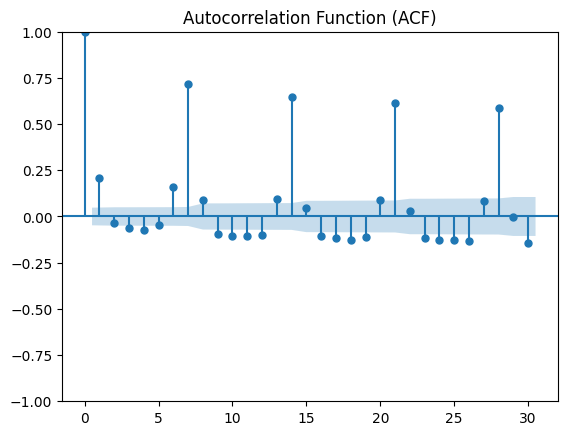

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotting ACF
plot_acf(df_timeseries['sales'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

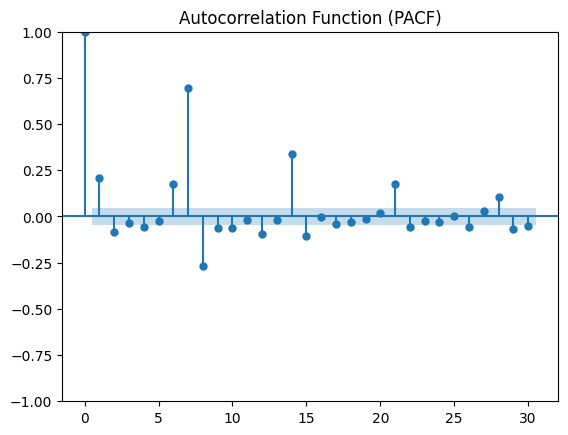

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotting ACF
plot_pacf(df_timeseries['sales'], lags=30)
plt.title('Autocorrelation Function (PACF)')
plt.show()

#### You can see there is a correlation between 7 lags

### Subsetting the data after 2016

In [47]:
df_timeseries_new=df_timeseries[df_timeseries['date']>='01-01-2016']
df_timeseries_new

,date,sales,promo_flag_new,holiday_flag
1107,2016-01-01,0.0,0,1
1108,2016-01-02,431.0,0,0
1109,2016-01-03,0.0,0,0
1110,2016-01-04,261.0,0,0
1111,2016-01-05,299.0,0,0
...,...,...,...,...
1709,2017-08-11,560.0,1,0
1710,2017-08-12,454.0,1,0
1711,2017-08-13,252.0,1,0
1712,2017-08-14,186.0,1,0


In [48]:
df_0=df_timeseries_new[df_timeseries_new['sales']==0.0]
df_0['Day_of_Week'] = df_0['date'].dt.day_name()
df_0

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\2976654079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Day_of_Week'] = df_0['date'].dt.day_name()


,date,sales,promo_flag_new,holiday_flag,Day_of_Week
1107,2016-01-01,0.0,0,1,Friday
1109,2016-01-03,0.0,0,0,Sunday
1116,2016-01-10,0.0,0,0,Sunday
1123,2016-01-17,0.0,0,0,Sunday
1130,2016-01-24,0.0,0,0,Sunday
1137,2016-01-31,0.0,0,0,Sunday
1146,2016-02-09,0.0,0,1,Tuesday
1151,2016-02-14,0.0,0,0,Sunday
1158,2016-02-21,0.0,0,0,Sunday
1165,2016-02-28,0.0,0,0,Sunday


In [49]:
df_timeseries_new[df_timeseries_new['sales']==0.0].count()

date              25
sales             25
promo_flag_new    25
holiday_flag      25
dtype: int64

#### They are usually sundays or holidays, we can impute average sales for these days to make the predictions better

In [50]:
mean_without_zeros = df_timeseries_new[df_timeseries_new['sales'] != 0]['sales'].mean()

# # Impute zeros with the mean
df_timeseries_new['sales'] = df_timeseries_new['sales'].replace(0, mean_without_zeros)

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\620764489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_new['sales'] = df_timeseries_new['sales'].replace(0, mean_without_zeros)


In [51]:
df_timeseries_new['date'] = pd.to_datetime(df_timeseries_new['date'])
df_timeseries_new.set_index('date', inplace=True)
df_timeseries_new

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\1516396235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_new['date'] = pd.to_datetime(df_timeseries_new['date'])


,sales,promo_flag_new,holiday_flag
date,,,
2016-01-01,356.738977,0,1
2016-01-02,431.000000,0,0
2016-01-03,356.738977,0,0
2016-01-04,261.000000,0,0
2016-01-05,299.000000,0,0
...,...,...,...
2017-08-11,560.000000,1,0
2017-08-12,454.000000,1,0
2017-08-13,252.000000,1,0


#### We convert the sales to integers as we will use a Poisson regressor for timeseries forecasting which requires the data to be of the form of integers

In [52]:
df_timeseries_new['sales']=df_timeseries_new['sales'].round()
df_timeseries_new['sales']=df_timeseries_new['sales'].astype(int)
df_timeseries_new

C:\Users\madha\AppData\Local\Temp\ipykernel_28752\1192760627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_new['sales']=df_timeseries_new['sales'].round()
C:\Users\madha\AppData\Local\Temp\ipykernel_28752\1192760627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_new['sales']=df_timeseries_new['sales'].astype(int)


,sales,promo_flag_new,holiday_flag
date,,,
2016-01-01,357,0,1
2016-01-02,431,0,0
2016-01-03,357,0,0
2016-01-04,261,0,0
2016-01-05,299,0,0
...,...,...,...
2017-08-11,560,1,0
2017-08-12,454,1,0
2017-08-13,252,1,0


In [16]:
! pip install pybats

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


In [53]:
from pybats.analysis import *
from pybats.point_forecast import *
from pybats.plot import *

### Let's fit the PyBATS model with the paramters on 200 days of data starting from 1-1-2016

In [54]:
prior_length = 7 # Number of days of data used to set prio
k = 7             # Forecast horizon
rho = 0.055          # Random effect discount factor to increase variance of forecast distribution
forecast_samps = 100000  # Number of forecast samples to draw
# forecast_start = pd.to_datetime('2016-01-01') # Date to start forecasting
# forecast_end = pd.to_datetime('2017-08-01')   # Date to stop forecasting
forecast_start =300 # Date to start forecasting
forecast_end = 500  # Date to stop forecasting

mod, samples, model_coef = analysis(df_timeseries_new['sales'].values, df_timeseries_new[['promo_flag_new', 'holiday_flag']].values,
                        k, forecast_start, forecast_end, nsamps=forecast_samps,
                        family='poisson',
                        seasPeriods=[7], seasHarmComponents=[[1]],
                        prior_length=prior_length, dates=df_timeseries_new.index,
                        rho=rho,
                        deltrend=1,                      # Discount factor on the trend component (the intercept)
                        delregn=1,
                        delseas = 1, # Discount factor on the seasonal component
                        delhol = 0, # Discount factor on the holiday component
                        ret = ['model', 'forecast', 'model_coef'])

beginning forecasting


In [55]:
forecast = median(samples[:,:,0])   
forecast.shape

(201,)

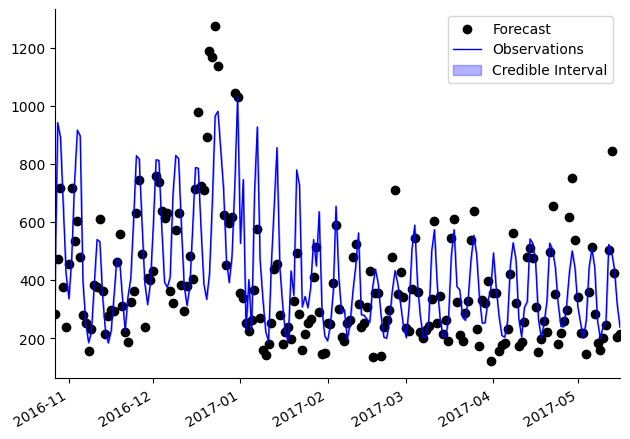

In [56]:
data_1step = df_timeseries_new.iloc[forecast_start:forecast_end+1,:]
samples_1step = samples[:,:,0]
fig, ax = plt.subplots(1,1)
ax = plot_data_forecast(fig, ax,
                        data_1step.sales,
                        median(samples_1step),
                        samples_1step,
                        data_1step.index,
                        credible_interval=0)

In [57]:
def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
    - y_true: Actual values
    - y_pred: Predicted values

    Returns:
    
    - MAPE
    """
    # Ensure that both arrays have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length.")

    # Avoid division by zero
    mask = y_true != 0

    # Calculate absolute percentage errors
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true[mask])

    # Calculate MAPE
    mape = np.mean(absolute_percentage_errors) * 100

    return mape

# Example usage:

mape_result = calculate_mape(data_1step.sales,median(samples_1step))
print(f'MAPE: {mape_result:.2f}%')


MAPE: 34.71%


In [58]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(data_1step.sales, median(samples_1step))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28227.162935323384


#### We observe a test MAPE of 34%, which is not great but also not too bad either

#### we fit the model with the same parameters on the last 54 days of data

In [62]:
prior_length = 7 # Number of days of data used to set prio
k = 7             # Forecast horizon
rho = 0.055      # Random effect discount factor to increase variance of forecast distribution
forecast_samps = 50000  # Number of forecast samples to draw
# forecast_start = pd.to_datetime('2016-01-01') # Date to start forecasting
# forecast_end = pd.to_datetime('2017-08-01')   # Date to stop forecasting
forecast_start =530 # Date to start forecasting
forecast_end = 584  # Date to stop forecasting

mod, samples, model_coef = analysis(df_timeseries_new['sales'].values, df_timeseries_new[['promo_flag_new', 'holiday_flag']].values,
                        k, forecast_start, forecast_end, nsamps=forecast_samps,
                        family='poisson',
                        seasPeriods=[7], seasHarmComponents=[[1]],
                        prior_length=prior_length, dates=df_timeseries_new.index,
                        rho=rho,
                        delseas = 1, # Discount factor on the seasonal component
                        delhol = 0, # Discount factor on the holiday component
                        ret = ['model', 'forecast', 'model_coef'])

beginning forecasting


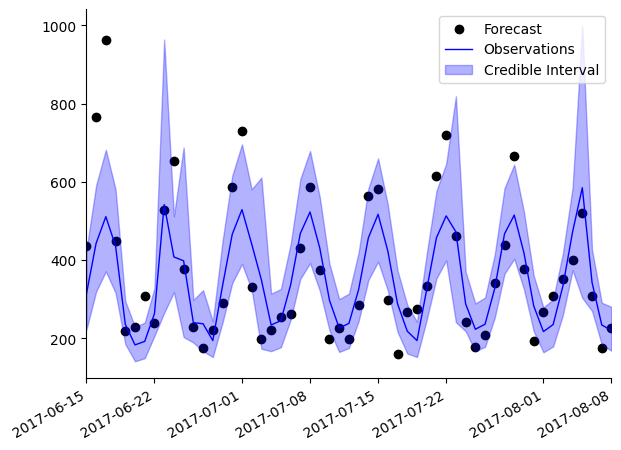

In [63]:
data_1step = df_timeseries_new.iloc[forecast_start:forecast_end+1,:]
samples_1step = samples[:,:,0]
fig, ax = plt.subplots(1,1)
ax = plot_data_forecast(fig, ax,
                        data_1step.sales,
                        median(samples_1step),
                        samples_1step,
                        data_1step.index,
                        credible_interval=95)

In [64]:
mape_result = calculate_mape(data_1step.sales,median(samples_1step))
print(f'MAPE: {mape_result:.2f}%')

MAPE: 21.02%


#### We see the test MAPE is at 21%, which is good

#### We now forecast into the future by considering promotions on wednesday

#### Now we forecast the sales for the future, considering rolling out promotions on wednesday and thursday. We compare the total sales for both scenarios to determine which day is better to rollout promotions

In [70]:
df_ts_wednesday_promo=pd.read_csv('ts_wednesday.csv')
mean_without_zeros = df_ts_wednesday_promo[df_ts_wednesday_promo['y'] != 0]['y'].mean()

# Impute zeros with the mean
df_ts_wednesday_promo['y'] = df_ts_wednesday_promo['y'].replace(0, mean_without_zeros)
df_ts_wednesday_promo

,Unnamed: 0,ds,y,promo_flag_new,holiday_flag,Unnamed: 5
0,0,2016-01-01,355.457045,0,1,Saturday
1,1,2016-01-02,431.000000,0,0,Sunday
2,2,2016-01-03,355.457045,0,0,Monday
3,3,2016-01-04,261.000000,0,0,Tuesday
4,4,2016-01-05,299.000000,0,0,Wednesday
...,...,...,...,...,...,...
602,602,2017-08-26,310.000000,1,0,Sunday
603,603,2017-08-27,311.000000,0,0,Monday
604,604,2017-08-28,312.000000,0,0,Tuesday
605,605,2017-08-29,313.000000,1,0,Wednesday


In [71]:
df_ts_wednesday_promo=df_ts_wednesday_promo.set_index('ds')

In [72]:
prior_length = 7 # Number of days of data used to set prio
k = 3             # Forecast horizon
rho = 0.055      # Random effect discount factor to increase variance of forecast distribution
forecast_samps = 5000  # Number of forecast samples to draw
# forecast_start = pd.to_datetime('2016-01-01') # Date to start forecasting
# forecast_end = pd.to_datetime('2017-08-01')   # Date to stop forecasting
forecast_start =590 # Date to start forecasting
forecast_end =604   # Date to stop forecasting

mod, samples, model_coef = analysis(df_ts_wednesday_promo['y'].values, df_ts_wednesday_promo[['promo_flag_new', 'holiday_flag']].values,
                        k, forecast_start, forecast_end, nsamps=forecast_samps,
                        family='poisson',
                        seasPeriods=[7], seasHarmComponents=[[1]],
                        prior_length=prior_length, dates=df_ts_wednesday_promo.index,
                        rho=rho,
                        delseas = 1, # Discount factor on the seasonal component
                        delhol = 0, # Discount factor on the holiday component
                        ret = ['model', 'forecast', 'model_coef'])

beginning forecasting


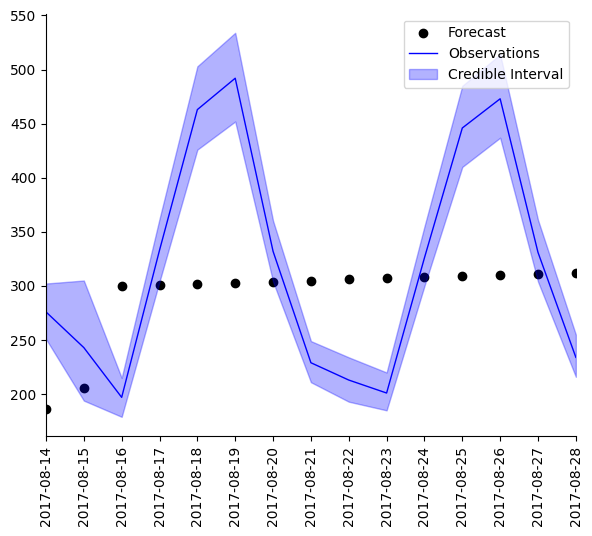

In [73]:
data_1step = df_ts_wednesday_promo.iloc[forecast_start:forecast_end+1,:]
samples_1step = samples[:,:,0]
fig, ax = plt.subplots(1,1)
ax = plot_data_forecast(fig, ax,
                        data_1step.y,
                        median(samples_1step),
                        samples_1step,
                        data_1step.index,
                        credible_interval=55)
plt.xticks(rotation='vertical')

plt.show()

In [74]:
sum(median(samples_1step))

4789.0

#### Performing the same operations for thursday

In [77]:
df_ts_thursday=pd.read_csv('ts_thursday.csv')
mean_without_zeros = df_ts_thursday[df_ts_thursday['y'] != 0]['y'].mean()

# Impute zeros with the mean
df_ts_thursday['y'] = df_ts_thursday['y'].replace(0, mean_without_zeros)
df_ts_thursday

,Unnamed: 0,ds,y,promo_flag_new,holiday_flag,Unnamed: 5
0,0,2016-01-01,355.457045,0,1,Saturday
1,1,2016-01-02,431.000000,0,0,Sunday
2,2,2016-01-03,355.457045,0,0,Monday
3,3,2016-01-04,261.000000,0,0,Tuesday
4,4,2016-01-05,299.000000,0,0,Wednesday
...,...,...,...,...,...,...
602,602,2017-08-26,310.000000,1,0,Sunday
603,603,2017-08-27,311.000000,0,0,Monday
604,604,2017-08-28,312.000000,0,0,Tuesday
605,605,2017-08-29,313.000000,0,0,Wednesday


In [78]:
df_ts_thursday=df_ts_thursday.set_index('ds')

In [79]:
prior_length = 8 # Number of days of data used to set prio
k = 3             # Forecast horizon
rho = 0.055      # Random effect discount factor to increase variance of forecast distribution
forecast_samps = 5000  # Number of forecast samples to draw
# forecast_start = pd.to_datetime('2016-01-01') # Date to start forecasting
# forecast_end = pd.to_datetime('2017-08-01')   # Date to stop forecasting
forecast_start =590 # Date to start forecasting
forecast_end =604   # Date to stop forecasting

mod, samples, model_coef = analysis(df_ts_thursday['y'].values, df_ts_thursday[['promo_flag_new', 'holiday_flag']].values,
                        k, forecast_start, forecast_end, nsamps=forecast_samps,
                        family='poisson',
                        seasPeriods=[7], seasHarmComponents=[[1]],
                        prior_length=prior_length, dates=df_ts_thursday.index,
                        rho=rho,
                        delseas = 1, # Discount factor on the seasonal component
                        delhol = 0, # Discount factor on the holiday component
                        ret = ['model', 'forecast', 'model_coef'])

beginning forecasting


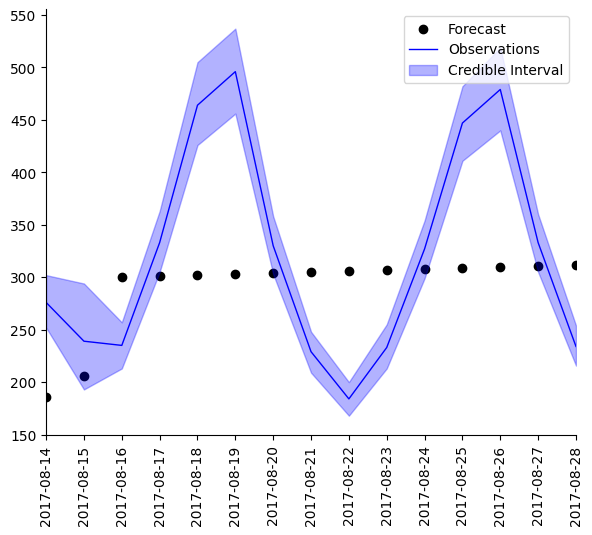

In [80]:
data_1step = df_ts_thursday.iloc[forecast_start:forecast_end+1,:]
samples_1step = samples[:,:,0]
fig, ax = plt.subplots(1,1)
ax = plot_data_forecast(fig, ax,
                        data_1step.y,
                        median(samples_1step),
                        samples_1step,
                        data_1step.index,
                        credible_interval=55)
plt.xticks(rotation='vertical')

plt.show()

In [81]:
sum(median(samples_1step))

4839.0

# Conclusion
### We see that total sales is forecasted $50 higher when promotions were rolled out on Thursday. This further strengthens the hypothesis that rolling out promotions on thursday might be beneficial

### Since the difference is just $50, it's better to perform the A/B testing for wednesday and thursday to better understand customer buying patterns